### Imports

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN

### Load Data

In [20]:
df = pd.read_csv("/Users/masc/Desktop/Advanced Analytics/Unsupervised Learning/CC GENERAL.csv")

In [21]:
df.shape

(8950, 18)

In [22]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Mean balance is 1564

Balance frequency is frequently updated on average ~0.9

Purchases average is 1000

one off purchase average is 600

Average purchases frequency is around 0.5

average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low Average credit limit ~ 4500

Percent of full payment is 15%

Average tenure is 11 years

In [27]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Data Preprocessing

In [28]:
# Dropping unecessary column

df.drop(['CUST_ID'], axis=1, inplace=True)

In [30]:
# Fill up the missing elements with mean for missing values

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

### Data Visualisation

In [31]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

### K-Means Model 

Find the optimal number of clusters using elbow method

In [32]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(df)
train_data.shape

(8950, 17)

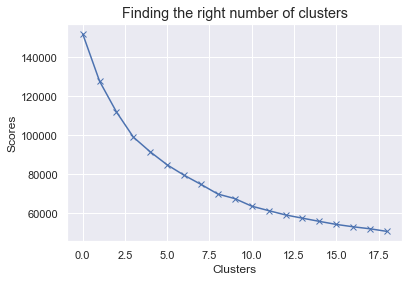

In [34]:
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train_data)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
However, the values does not reduce linearly until 8th cluster.

Based on Silhoutte Score and Elbow, we can consider clusters to be 8

In [36]:
kmeans = KMeans(8)
kmeans.fit(train_data)
labels = kmeans.labels_

kmeans.cluster_centers_.shape

(8, 17)

In [37]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.568819,0.370653,-0.227524,-0.159326,-0.245333,1.956136,-0.485104,-0.208219,-0.434458,1.919735,1.859395,-0.279823,0.954088,0.745672,0.353171,-0.390486,-0.103098
1,1.036750,0.464401,2.514202,1.825444,2.591186,-0.155994,1.164784,1.580549,1.270756,-0.279211,-0.146260,3.130116,1.310212,1.454854,0.385331,0.260577,0.337262
2,-0.012678,0.371475,-0.358492,-0.241319,-0.404202,-0.080560,-0.863236,-0.394358,-0.766918,0.139206,-0.024297,-0.486744,-0.339912,-0.266116,-0.057458,-0.453978,-0.006176
3,-0.117657,0.394766,0.528137,0.649693,0.054977,-0.327575,0.967303,1.845527,0.193984,-0.406568,-0.331120,0.609482,0.434774,0.133700,-0.155793,0.410715,0.208245
4,-0.698334,-2.137011,-0.318252,-0.236901,-0.317172,-0.306904,-0.567385,-0.435638,-0.461465,-0.485303,-0.360562,-0.428477,-0.214478,-0.222983,-0.255329,0.252165,-0.160772
5,-0.398249,0.306450,-0.061358,-0.255954,0.325105,-0.360603,0.981107,-0.409519,1.174503,-0.460058,-0.356718,0.137232,-0.319197,-0.242338,-0.108169,0.359226,-0.028976
6,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [38]:
#Convert clusters_center to positive values

cluster_centers = scale.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4829.839951,0.965075,517.097081,327.988472,189.215743,5080.980055,0.295655,0.140342,0.191773,0.519303,15.937829,7.754478,7965.810901,3891.791711,1687.257233,0.039504,11.379347
1,3722.382509,0.987283,6374.835584,3622.300370,2754.244615,651.745406,0.957835,0.673966,0.869468,0.079271,2.250712,92.512821,9261.538462,5944.804836,1762.205295,0.229929,11.968661
2,1538.086096,0.965270,237.280253,191.896679,45.552648,809.933549,0.143892,0.084813,0.059645,0.163001,3.083020,2.611206,3257.709828,962.763719,730.302896,0.020934,11.509054
3,1319.581922,0.970787,2131.577169,1670.794072,460.783097,291.931251,0.878576,0.753014,0.441531,0.053786,0.989176,29.859284,6076.335629,2120.191746,501.138664,0.273842,11.796003
4,110.951796,0.371032,323.253988,199.230564,124.252790,335.279770,0.262631,0.072498,0.181040,0.038030,0.788253,4.059505,3714.091108,1087.629059,269.173718,0.227469,11.302164
5,735.552403,0.949866,872.111837,167.606594,705.055902,222.668945,0.884116,0.080290,0.831215,0.043082,0.814490,18.120904,3333.081857,1031.598756,612.124146,0.258782,11.478542
6,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,0.000000,11.918919
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [39]:
y_kmeans = kmeans.fit_predict(train_data)
y_kmeans

array([1, 2, 7, ..., 3, 3, 3], dtype=int32)

In [40]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


### Principal Component Analysis

In [41]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(train_data)
principal_comp

array([[-1.68221958, -1.0764516 ],
       [-1.13829541,  2.5064695 ],
       [ 0.96968282, -0.38351508],
       ...,
       [-0.92620219, -1.81078444],
       [-2.33655015, -0.65796621],
       [-0.55642406, -0.40046362]])

In [42]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
2181,-1.515721,1.570492
2758,0.946092,-0.101887
8641,-1.624074,-1.611050
5417,-2.268452,-0.674572
3995,-1.929127,-1.180300


In [43]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,2
1,-1.138295,2.506470,0
2,0.969683,-0.383515,3
3,-0.873629,0.043168,2
4,-1.599432,-0.688583,2


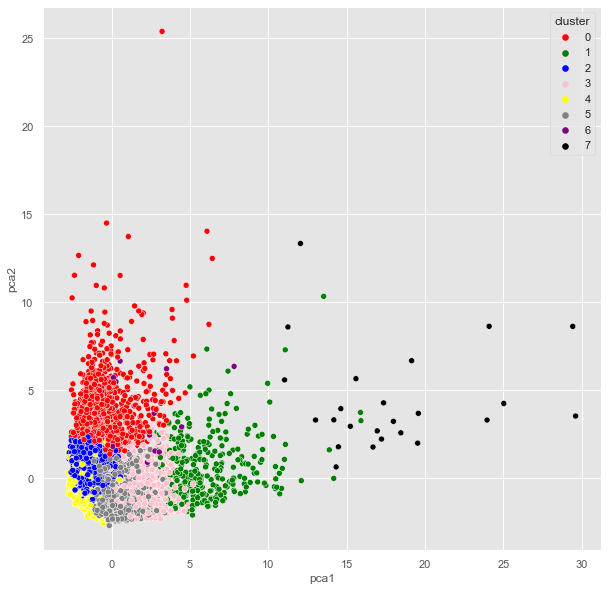

In [44]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()